<div class = "alert alert-info"> <h2 align = center> La prédiction ... du grand art ! </h2> 
    <h3 align = center> <font color = grey> Evaluation des oeuvres d'art de Picasso </font> </h3>
</div>

Le prix de vente d'une oeuvre d'art correspond t-il à sa valeur catalogue ? Autrement dit, les valeurs que l'on trouve dans les catalogues de vente aux enchères sont-elles de bon prédicteurs de prix réalisés lors de la vente ? Nous allons essayer de repondre à cette question en nous basant sur les données de ventes de gravures de Pablo Picasso, contenant la fourchette de prix estimée dans le catalogue *Arcurial 2009*, ainsi que d'autres déterminant utilisés par les experts dans la valorisation des oeuvres d'art tels que la taille de l'oeuvre et son âge.  

<h3> <font color = red> <u> Description des données </u> </font> </h3>

Notre jeu de données contient 1529 transactions des oeuvres du célèbre peintre espagnol Pablo Picasso entre 2015 et 2017. Il contient 7 variables qui sont: 

- date: la date de la transaction
- bas: le prix le plus bas prédit dans le catalogue (en milier d'euro)
- haut: le prix le plus haut prédit dans le catalogue (en milier d'euro)
- prix: le prix réalisé lors de la transaction (en milier d'euro)
- hauteur: la hauteur de l'oeuvre en cm
- largeur: la largeur de l'oeuvre en cm
- age: l'age de Picasso au moment de la réalisation de l'oeuvre.

<h3> <font color = red> <u> Analyse des données </u> </font> </h3>

In [2]:
# importation des données

data <- read.csv("../data/picasso2017.csv")

In [3]:
# Apercu des premieres lignes

head(data)

date,bas,haut,prix,hauteur,largeur,age
12/3/2015,400,600,1000,88.900,63.500,80
12/3/2015,400,600,1200,89.535,64.135,80
10/21/2015,500,700,300,76.200,55.880,71
10/21/2015,500,700,300,55.880,73.660,65
1/31/2016,500,700,840,148.590,96.520,88
7/9/2016,500,700,175,26.670,20.955,61


In [4]:
# dimension du jeu de données

dim(data)

[1] 1529    7

Nous allons créer une nouvelle variable représentant le prix de vente moyen prédit par le catalogue `((prix-haut + prix-bas)/2)`. Ensuite nous allons voir si ce prix moyen est un bon estimateur du prix réalisé. 

In [5]:
# création de la nouvelle variable

cat <- (data$haut + data$bas)/2

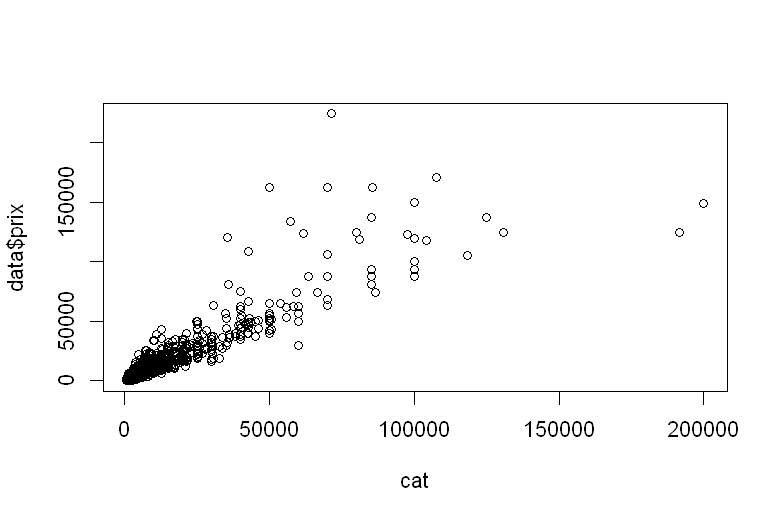

In [6]:
# options d'affichage de graphique
options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.res = 130)

# Nuage de points entre le prix moyen du catalogue et le prix réalisé.
plot(cat, data$prix)

On peut voir sur ce graphique que le lien entre les deux variables est positif; c'est-à-dire plus les prix moyen prédits par le catalogue augmentent, plus les prix réalisés ont tendance à augmenter. Nous constatons également qu'une grande partie des données sont concentrées à de petites valeurs et seulement un petit nombre d'observation prend de grandes valeur. La dipersion de ces grandes valeur est également plus importantes que celle des petites valeurs. L'hypothèse d'homoscédasticité n'est donc pas respectée pour ces données. On va donc travailler en logarithme (spécification log-log) avec ces données pour palier à ces problèmes.

In [7]:
# transformation des variables 

logprix <- log(data$prix)
logcat <- log(cat)

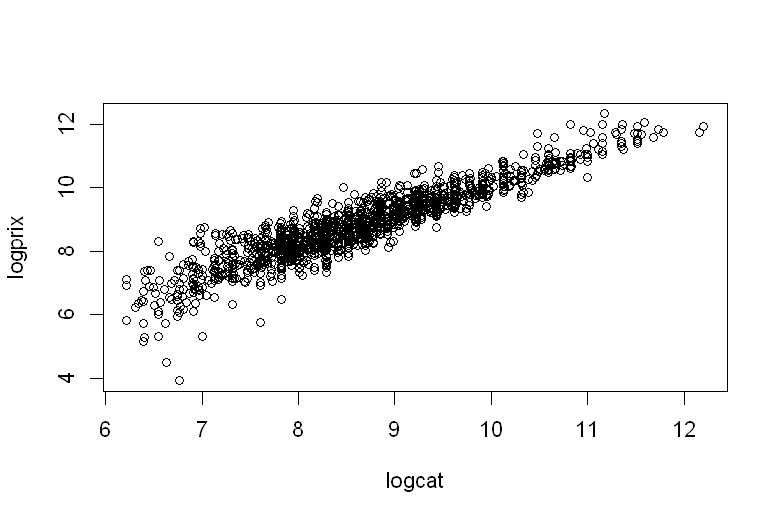

In [8]:
# nuage de points avec les variables transformées

plot(logcat, logprix)

On voit donc sur ce nouveau graphique que la dispersion des observations semble être homogène le long de l'axe des abscisses.

Avec cette tranformation de variables, nous éssayons à présent de voir si le logarithme du prix moyen estimé dans le catalogue est un bon prédicteur du logarithme du prix réalisé. 

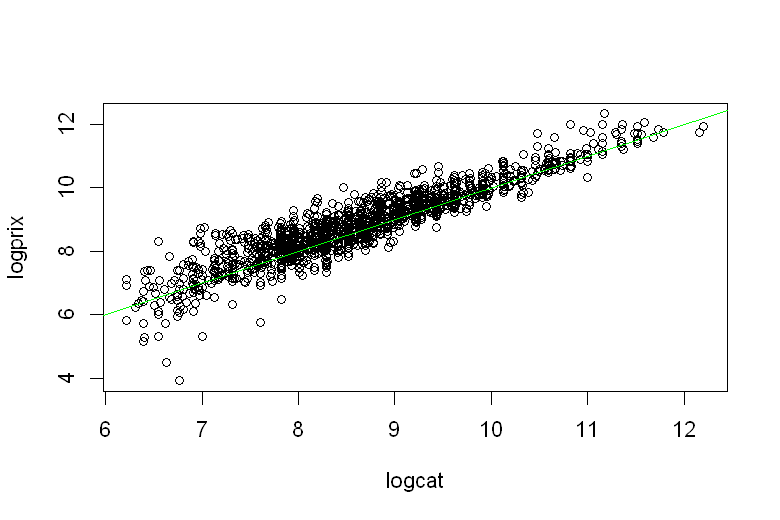

In [22]:
# ajout de la droite d'égalité des deux variables

plot(logcat, logprix)
abline(0, 1, col = "green") # 0 représente l'intercept et 1 la pente

Cette droite d'équation `y = x` représente notre ligne de reférence que nous allons comparer avec la droite du modèle de regression linéaire. 


Nous allons par la suite regarder si les variables taille de l'oeuvre et âge de l'artisrte apportent des informations importantes dans la valorisation des oeuvres d'art au delà de la prédiction du catalogue. 

In [23]:
# influence des varaibles taille de l'oeuvre et age de Picasso sur le prix réalisé

modele1 <- lm(logprix ~ data$hauteur + data$largeur + data$age)
summary(modele1)


Call:
lm(formula = logprix ~ data$hauteur + data$largeur + data$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9037 -0.6166 -0.0436  0.6233  3.4791 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8619616  0.1456076  67.730  < 2e-16 ***
data$hauteur -0.0006295  0.0014569  -0.432    0.666    
data$largeur  0.0006055  0.0014914   0.406    0.685    
data$age     -0.0143650  0.0019771  -7.266  5.9e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.077 on 1525 degrees of freedom
Multiple R-squared:  0.03419,	Adjusted R-squared:  0.03229 
F-statistic:    18 on 3 and 1525 DF,  p-value: 1.772e-11


A partir de ces résultats nous pouvons voir que les variables associées à la taille de l'oeuvre n'ont pas d'importance sur le plan statistisque dans la détermination du prix réalisé. Cependant la variable associée à l'age de Picasso est très significative. Son coefficient qui est négatif signifie que les oeuvres réalisées par Picasso dans sa jeunesse sont plus valorisées que celles qu'il a réalisées lorsqu'il était âgé. 

In [25]:
# modele avec la variable log-catalogue

modele2 <- lm(logprix ~ logcat +data$hauteur + data$largeur + data$age)
summary(modele2)


Call:
lm(formula = logprix ~ logcat + data$hauteur + data$largeur + 
    data$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06522 -0.25222 -0.03154  0.25449  1.50321 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.800e-01  1.201e-01   3.164  0.00159 ** 
logcat        9.736e-01  1.081e-02  90.100  < 2e-16 ***
data$hauteur -7.667e-04  5.794e-04  -1.323  0.18590    
data$largeur -1.048e-05  5.931e-04  -0.018  0.98591    
data$age      7.403e-04  8.039e-04   0.921  0.35731    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4284 on 1524 degrees of freedom
Multiple R-squared:  0.8473,	Adjusted R-squared:  0.8469 
F-statistic:  2115 on 4 and 1524 DF,  p-value: < 2.2e-16


Dans ce nouveau modèle, on remarque qu'en présence de la variable `logcat`,  la variable `age` n'est plus significative ce qui s'explique par le fait qu'elle a déjà été prise en compte dans l'estimation faite dans le catalogue. On en déduit que les variables age de Picasso et taille de l'oeuvre ne semblent pas apporter des informations au delà des informations apportées par le catalogue sur la prédiction du prix réalisé lors de la vente. 


Revenons donc à un modele simple ou le logarithme du prix moyen prédit par le catalogue est la seule variable explicative du prix réalisé.

In [26]:
# modele 

modele3 <- lm(logprix ~ logcat)
summary(modele3)


Call:
lm(formula = logprix ~ logcat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0820 -0.2488 -0.0336  0.2560  1.5228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41932    0.09216    4.55  5.8e-06 ***
logcat       0.97146    0.01059   91.76  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4292 on 1527 degrees of freedom
Multiple R-squared:  0.8465,	Adjusted R-squared:  0.8464 
F-statistic:  8420 on 1 and 1527 DF,  p-value: < 2.2e-16


Dans ce modèle, on remarque que les coefficients estimées (intercept = 0.42 et pente = 0.97) sont assez proche de ceux de notre ligne de référence. Visualisons à présent la droite de notre modèle sur le nuage de point. 

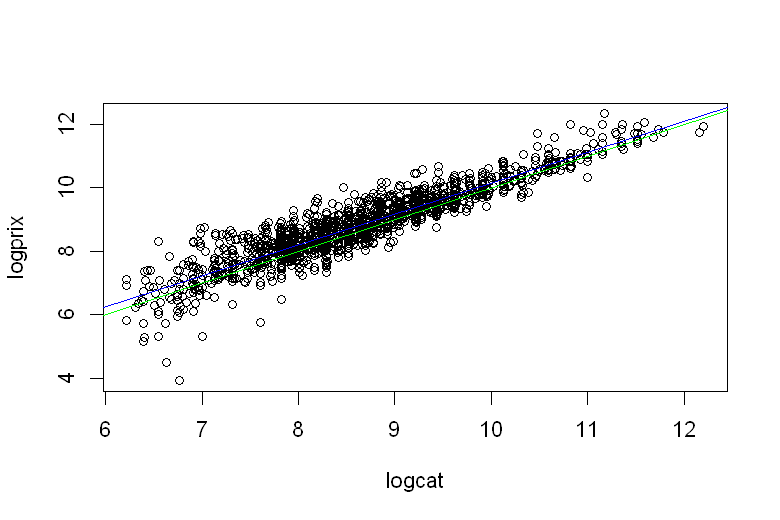

In [27]:
# droite du modèle 

plot(logcat, logprix)
abline(0, 1, col = "green")
abline(modele3, col = "blue")

Nous remarquons que la droite de notre modèle de regression linéaire est assez proche de notre droite de reférence. On note qu'elle est au dessus de la droite de reférence; ce qui voudrait dire que l'espérance conditionnelle du logarithme des prix réalisés est supérieure au logarithme des prix du catalogues. 


`A partir de l'inégalité de Jensen, on a : log(E[Y/X]) > E[log(Y)/X] car la fonction logarithme est concave.
Comme d'après les estimations de notre modèle on a E[log(Y)/X] > log(X), on obtient: log(E[Y/X]) > log(X); 
D'ou en applicant la fonction exponentielle croissante, on obtient : E[Y/X] > X.
Ainsi, l'espérance conditionnelle des prix réalisés est supérieure à la moyenne des prix prédits par le catalogue.`


Comme conclusion de ce résultat, nous pouvons dire que les catalogues de vente des oeuvres d'art semblent sous-estimer les prix de vente des oeuvres de Picasso, réalisés lors des ventes publiques.  